In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kalimati-tarkari-prices-from-may-2021-to-september-2023 (1).csv')
df_rename = df.copy()   
df_rename.columns = ["Crop Name", "Date", "Unit", "Minimum_Rate", "Maximum_Rate", "Average_Rate"]

df_rename['Average_Rate'] = pd.to_numeric(df_rename['Average_Rate'], errors='coerce')


In [14]:
print(df_rename.dtypes)

Crop Name       object
Date            object
Unit            object
Minimum_Rate    object
Maximum_Rate    object
Average_Rate    object
dtype: object


In [21]:
crop_prices = df_rename.groupby('Crop Name')['Average_Rate'].mean()
highest_price_crop = crop_prices.idxmax()
lowest_price_crop = crop_prices.idxmin()
print("The crop with the highest average price is: {}".format(highest_price_crop))
print("The crop with the lowest average price is: {}".format(lowest_price_crop))

The crop with the highest average price is: Asparagus
The crop with the lowest average price is: Cabbage(Terai)


In [22]:
df_rename.head()

,Crop Name,Date,Unit,Minimum_Rate,Maximum_Rate,Average_Rate
0,Tomato Big(Indian),1/5/2021,Kg,50,60,55.0
1,Tomato Small(Local),1/5/2021,Kg,30,35,32.5
2,Tomato Small(Tunnel),1/5/2021,Kg,30,35,32.5
3,Tomato Small(Indian),1/5/2021,KG,40,45,42.5
4,Tomato Small(Terai),1/5/2021,KG,40,45,42.5


In [23]:
df_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96479 entries, 0 to 96478
Data columns (total 6 columns):
Crop Name       96479 non-null object
Date            96479 non-null object
Unit            96479 non-null object
Minimum_Rate    96479 non-null object
Maximum_Rate    96479 non-null object
Average_Rate    45323 non-null float64
dtypes: float64(1), object(5)
memory usage: 4.4+ MB


In [24]:
df_rename.describe()

,Average_Rate
count,45323.000000
mean,123.084494
std,127.606537
min,7.500000
25%,47.500000
50%,85.000000
75%,155.000000
max,2900.000000


In [30]:
crop_prices = df_rename.groupby('Crop Name')['Average_Rate'].mean()
highest_price_crop = crop_prices.idxmax()
lowest_price_crop = crop_prices.idxmin()
print("The crop with the highest average price is: {}".format(highest_price_crop))
print("The crop with the lowest average price is: {}".format(lowest_price_crop))

The crop with the highest average price is: Asparagus
The crop with the lowest average price is: Cabbage(Terai)


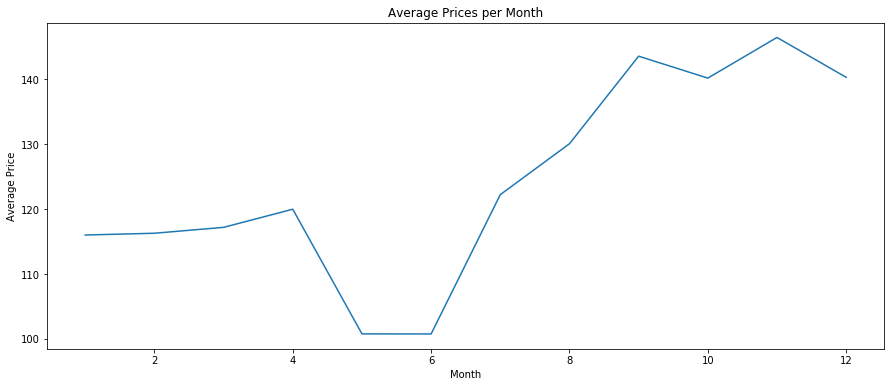

In [33]:
df_rename['Date'] = pd.to_datetime(df_rename['Date'])
df_rename['Month'] = df_rename['Date'].dt.month
monthly_prices = df_rename.groupby('Month')['Average_Rate'].mean()

plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_prices.index, y=monthly_prices.values)
plt.title('Average Prices per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

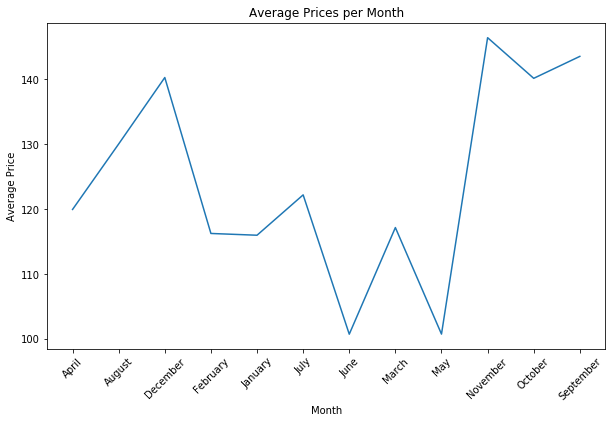

In [34]:
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_rename['Month'] = df_rename['Month'].map(dict(zip(range(1, 13), month_names)))

monthly_prices = df_rename.groupby('Month')['Average_Rate'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_prices.index, y=monthly_prices.values)
plt.title('Average Prices per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

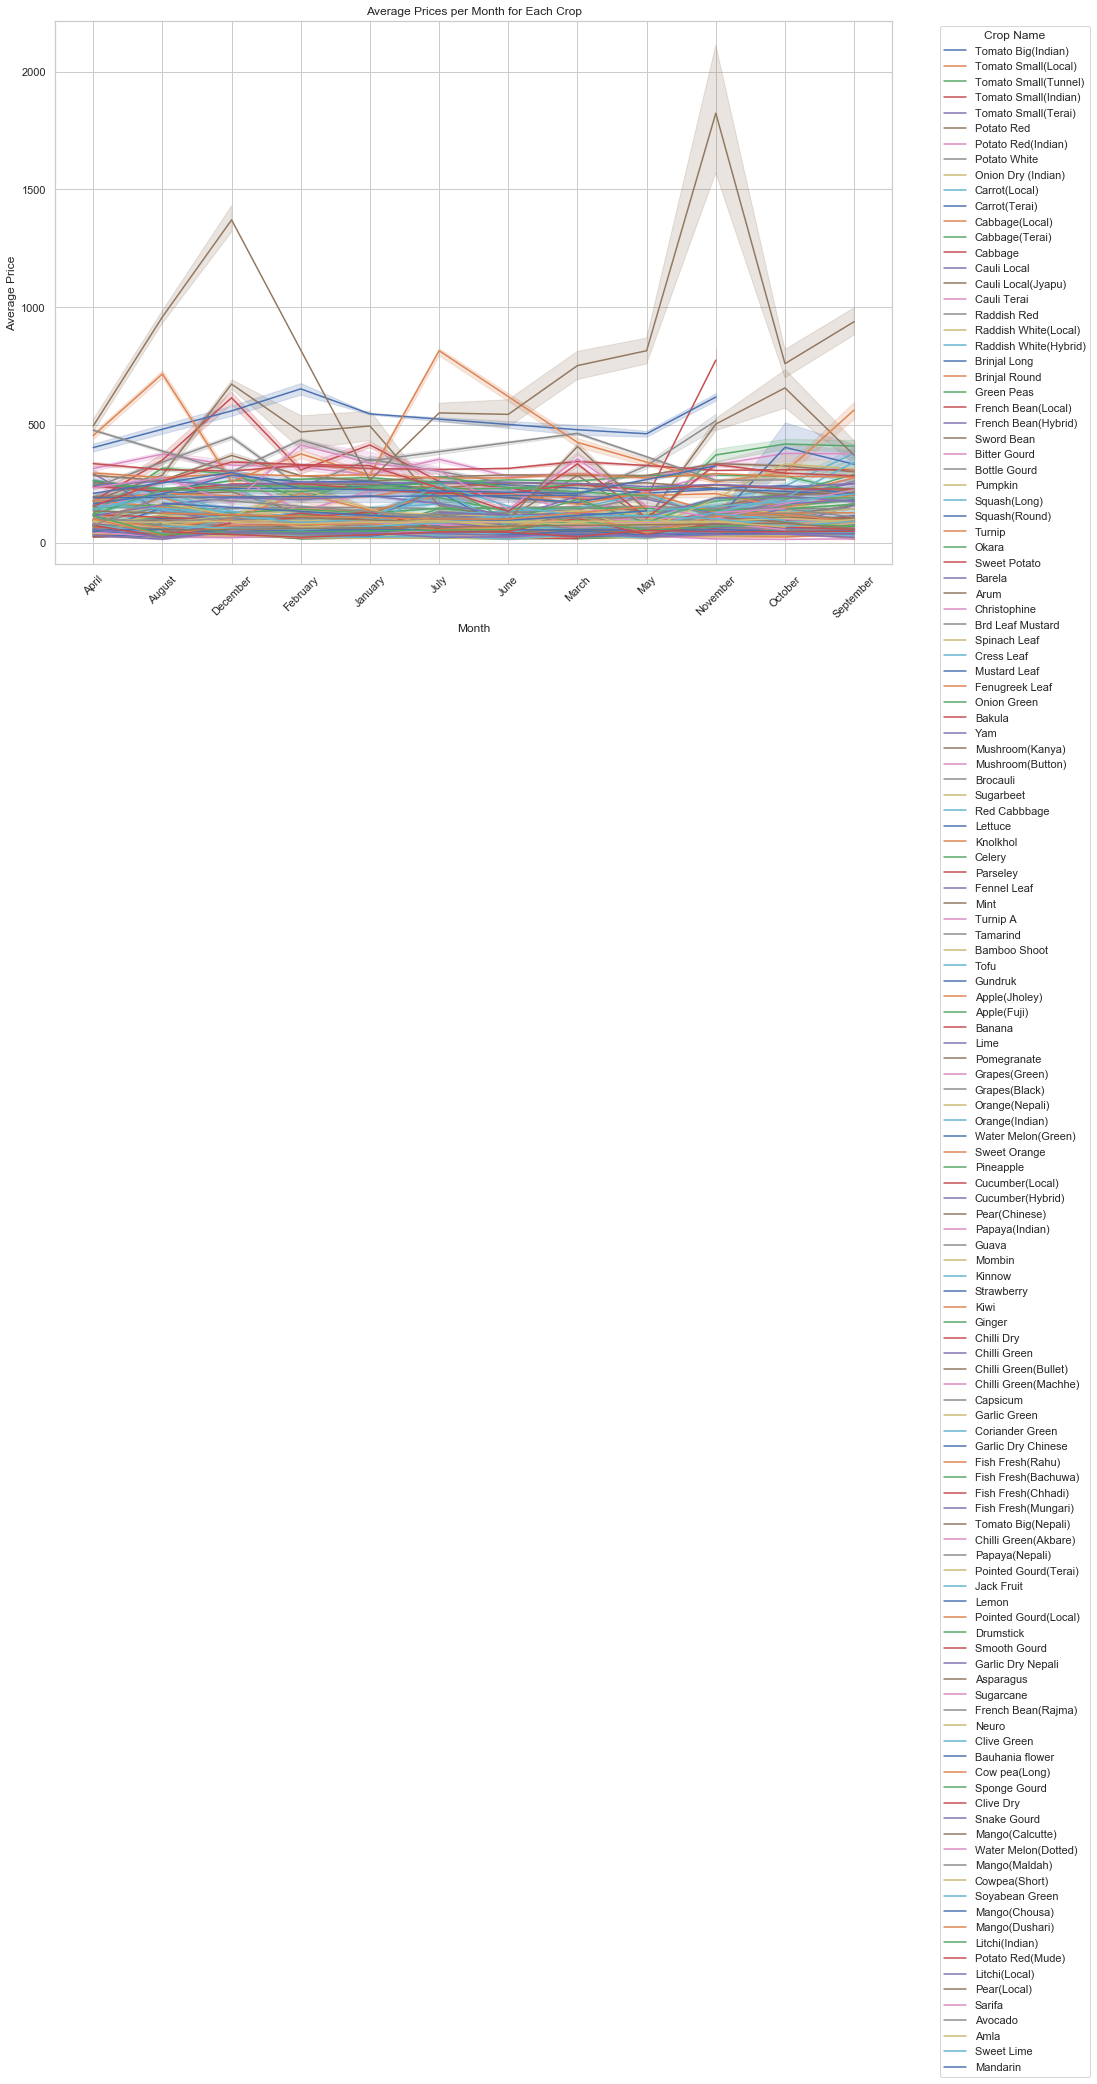

In [38]:

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")


for crop in df_rename['Crop Name'].unique():
    crop_data = df_rename[df_rename['Crop Name'] == crop]
    sns.lineplot(x='Month', y='Average_Rate', data=crop_data, label=crop)


plt.title('Average Prices per Month for Each Crop')
plt.xlabel('Month')
plt.ylabel('Average Price')


plt.xticks(rotation=45)


plt.legend(title='Crop Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

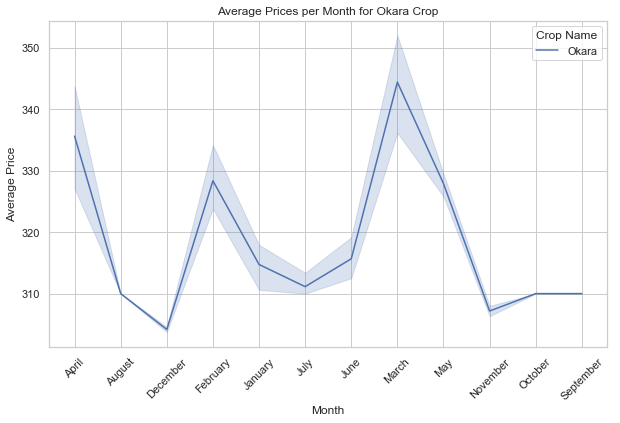

In [40]:
okara_data = df_rename[df_rename['Crop Name'] == 'Chilli Dry']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(x='Month', y='Average_Rate', data=okara_data, label='Okara')


plt.title('Average Prices per Month for Okara Crop')
plt.xlabel('Month')
plt.ylabel('Average Price')


plt.xticks(rotation=45)


plt.legend(title='Crop Name')


plt.show()

Selected Crop: {selected_crop_name}
        Crop Name       Date Unit Minimum_Rate Maximum_Rate  Average_Rate  \
26   Bitter Gourd 2021-01-05   Kg          100          110         105.0   
122  Bitter Gourd 2021-01-06   Kg          100          110         105.0   
218  Bitter Gourd 2021-01-07   Kg          100          120         110.0   
313  Bitter Gourd 2021-01-08   Kg          100          110         105.0   
406  Bitter Gourd 2021-01-09   Kg          100          110         105.0   

       Month  
26   January  
122  January  
218  January  
313  January  
406  January  


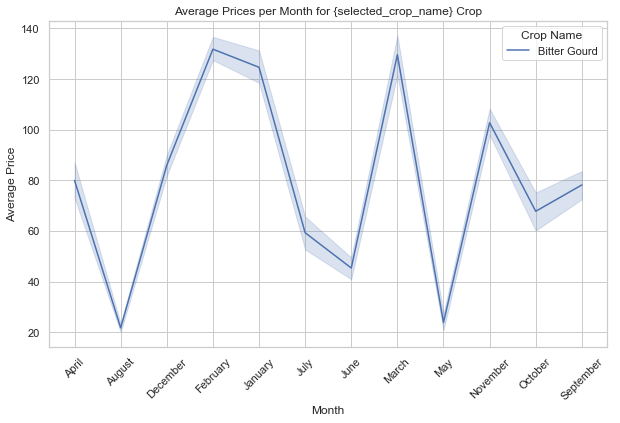

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_rename = pd.read_csv('kalimati-tarkari-prices-from-may-2021-to-september-2023 (1).csv')


df_rename.columns = ["Crop Name", "Date", "Unit", "Minimum_Rate", "Maximum_Rate", "Average_Rate"]

# Monthly analysis for a specific crop
selected_crop_name = 'Bitter Gourd'  # Replace with the crop name you're interested in


df_rename['Average_Rate'] = pd.to_numeric(df_rename['Average_Rate'], errors='coerce')

df_rename['Date'] = pd.to_datetime(df_rename['Date'])
df_rename['Month'] = df_rename['Date'].dt.month

# Map month numbers to month names
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_rename['Month'] = df_rename['Month'].map(dict(zip(range(1, 13), month_names)))

# Filter data for the selected crop
selected_crop_data = df_rename[df_rename['Crop Name'] == selected_crop_name]

# Create a line plot for the selected crop

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(x='Month', y='Average_Rate', data=selected_crop_data, label=selected_crop_name)

# Set plot title and labels
plt.title('Average Prices per Month for {selected_crop_name} Crop')
plt.xlabel('Month')
plt.ylabel('Average Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.legend(title='Crop Name')

# Display some information to verify the selected crop
print("Selected Crop: {selected_crop_name}")
print(selected_crop_data.head())  # Display the first few rows of data for the selected crop

# Show the plot
plt.show()


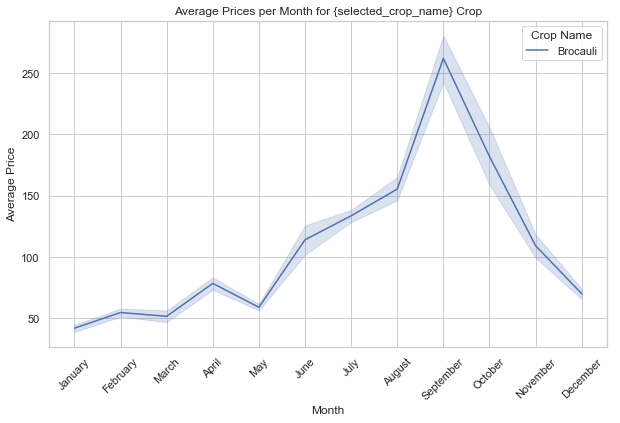

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_rename = pd.read_csv('kalimati-tarkari-prices-from-may-2021-to-september-2023 (1).csv')

# Add column names
df_rename.columns = ["Crop Name", "Date", "Unit", "Minimum_Rate", "Maximum_Rate", "Average_Rate"]

# Monthly analysis for a specific crop
selected_crop_name = 'Brocauli'  # Replace with the crop name you're interested in

df_rename['Date'] = pd.to_datetime(df_rename['Date'])
df_rename['Month'] = df_rename['Date'].dt.month

# Map month numbers to month names
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_rename['Month'] = pd.Categorical(df_rename['Month'].map(dict(zip(range(1, 13), month_names))), categories=month_names, ordered=True)

# Ensure 'Average_Rate' is treated as numeric
df_rename['Average_Rate'] = pd.to_numeric(df_rename['Average_Rate'], errors='coerce')

# Filter data for the selected crop
selected_crop_data = df_rename[df_rename['Crop Name'] == selected_crop_name]

# Create a line plot for the selected crop
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(x='Month', y='Average_Rate', data=selected_crop_data, label=selected_crop_name)

# Set plot title and labels
plt.title('Average Prices per Month for {selected_crop_name} Crop')
plt.xlabel('Month')
plt.ylabel('Average Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Crop Name')

# Show the plot
plt.show()


Mean Squared Error: {mse}


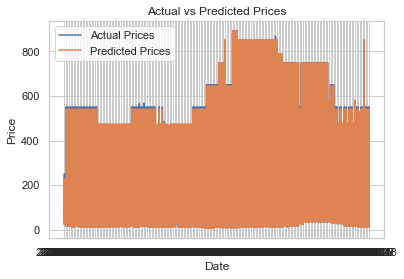

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re

# Load your CSV file
df_rename = pd.read_csv('kalimati-tarkari-prices-from-may-2021-to-september-2023 (1).csv')

# Add column names
df_rename.columns = ["Crop_Name", "Date", "Unit", "Minimum_Rate", "Maximum_Rate", "Average_Rate"]

# Clean and convert columns to numeric
for column in ['Minimum_Rate', 'Maximum_Rate', 'Average_Rate']:
    df_rename[column] = df_rename[column].apply(lambda x: re.sub('[^0-9.]', '', str(x)))
    df_rename[column] = pd.to_numeric(df_rename[column], errors='coerce')

# Select features and target variable
features = ['Minimum_Rate', 'Maximum_Rate']
target = 'Average_Rate'

# Train-test split
train_data, test_data = train_test_split(df_rename, test_size=0.2, shuffle=False)

# Create and train the model
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Make predictions for the test set
predictions = model.predict(test_data[features])

# Evaluate the model
mse = mean_squared_error(test_data[target], predictions)
print('Mean Squared Error: {mse}')

# Make predictions for 2024 
features_2024 = pd.DataFrame({
    "Minimum_Rate": [20.0],  # Replace with actual values for 2024
    "Maximum_Rate": [250.0]   # Replace with actual values for 2024
})

features_2024 = features_2024.apply(pd.to_numeric, errors='coerce')

# Make predictions for 2024
predicted_prices_2024 = model.predict(features_2024)

# Visualize predictions
plt.plot(test_data['Date'], test_data[target], label='Actual Prices')
plt.plot(test_data['Date'], predictions, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [77]:

print(train_data.columns)


Index([u'Tomato Big(Nepali)', u'1/5/2021', u'Kg', u'50', u'60', u'55'], dtype='object')


In [80]:
print(df_rename.columns)

Index([u'Crop_Name', u'Date', u'Unit', u'Minimum_Rate', u'Maximum_Rate',
       u'Average_Rate'],
      dtype='object')


In [81]:
print(df_rename.head())


              Crop_Name      Date Unit Minimum_Rate Maximum_Rate  Average_Rate
0    Tomato Big(Indian)  1/5/2021   Kg           50           60          55.0
1   Tomato Small(Local)  1/5/2021   Kg           30           35          32.5
2  Tomato Small(Tunnel)  1/5/2021   Kg           30           35          32.5
3  Tomato Small(Indian)  1/5/2021   KG           40           45          42.5
4   Tomato Small(Terai)  1/5/2021   KG           40           45          42.5


In [82]:
print(df_rename.dtypes)


Crop_Name        object
Date             object
Unit             object
Minimum_Rate     object
Maximum_Rate     object
Average_Rate    float64
dtype: object


In [83]:
# Print column names
print(df_rename.columns)

# Inspect a few rows of data
print(df_rename.head())

# Check data types
print(df_rename.dtypes)


Index([u'Crop_Name', u'Date', u'Unit', u'Minimum_Rate', u'Maximum_Rate',
       u'Average_Rate'],
      dtype='object')
              Crop_Name      Date Unit Minimum_Rate Maximum_Rate  Average_Rate
0    Tomato Big(Indian)  1/5/2021   Kg           50           60          55.0
1   Tomato Small(Local)  1/5/2021   Kg           30           35          32.5
2  Tomato Small(Tunnel)  1/5/2021   Kg           30           35          32.5
3  Tomato Small(Indian)  1/5/2021   KG           40           45          42.5
4   Tomato Small(Terai)  1/5/2021   KG           40           45          42.5
Crop_Name        object
Date             object
Unit             object
Minimum_Rate     object
Maximum_Rate     object
Average_Rate    float64
dtype: object


In [86]:
# Print column names
print(df_rename.columns)


Index([u'Crop_Name', u'Date', u'Unit', u'Minimum_Rate', u'Maximum_Rate',
       u'Average_Rate'],
      dtype='object')


Mean Squared Error: {mse}


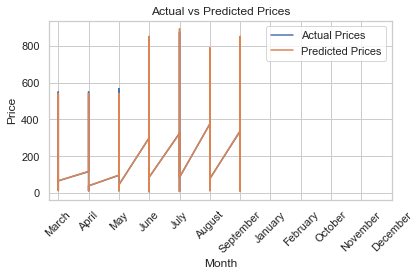

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import calendar
import re

# Load your CSV file
df_rename = pd.read_csv('kalimati-tarkari-prices-from-may-2021-to-september-2023 (1).csv')

# Add column names
df_rename.columns = ["Crop_Name", "Date", "Unit", "Minimum_Rate", "Maximum_Rate", "Average_Rate"]

# Clean and convert columns to numeric
for column in ['Minimum_Rate', 'Maximum_Rate', 'Average_Rate']:
    df_rename[column] = df_rename[column].apply(lambda x: re.sub('[^0-9.]', '', str(x)))
    df_rename[column] = pd.to_numeric(df_rename[column], errors='coerce')

# Create a list of all 12 months
all_months = list(calendar.month_name)[1:]

# Extract month names from the 'Date' column
df_rename['Month'] = pd.to_datetime(df_rename['Date']).dt.month_name()

# Select features and target variable
features = ['Minimum_Rate', 'Maximum_Rate']
target = 'Average_Rate'

# Train-test split
train_data, test_data = train_test_split(df_rename, test_size=0.2, shuffle=False)

# Create and train the model
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Make predictions for the test set
predictions = model.predict(test_data[features])

# Evaluate the model
mse = mean_squared_error(test_data[target], predictions)
print('Mean Squared Error: {mse}')

# Make predictions for 2024 
features_2024 = pd.DataFrame({
    "Minimum_Rate": [20.0],  # Replace with actual values for 2024
    "Maximum_Rate": [50.0]   # Replace with actual values for 2024
})

features_2024 = features_2024.apply(pd.to_numeric, errors='coerce')

# Make predictions for 2024
predicted_prices_2024 = model.predict(features_2024)

# Visualize predictions with all 12 months on the x-axis
plt.plot(test_data['Month'], test_data[target], label='Actual Prices')
plt.plot(test_data['Month'], predictions, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(all_months, rotation=45)  # Use all 12 months as x-axis ticks
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [100]:
# Check unique values in the 'Month' column
unique_months = df_rename['Month'].unique()
print(unique_months)


['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [102]:
df_rename['Date'] = pd.to_datetime(df_rename['Date'])


In [103]:
df_rename = df_rename.sort_values('Date')


/Users/nibeshadhikari/.pyenv/versions/2.7.18/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


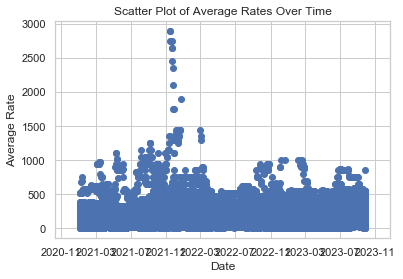

In [104]:
plt.scatter(df_rename['Date'], df_rename['Average_Rate'])
plt.title('Scatter Plot of Average Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rate')
plt.show()
